In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


El primer paso es importar el dataset de fetch_lfw_people, el cual consiste en caras de personas. En esta parte se está filtrando para incluir a las personas que tengan al menos 60 imágenes, de manera que se garantiza una mejor capacidad para que el modelo pueda aprender. 

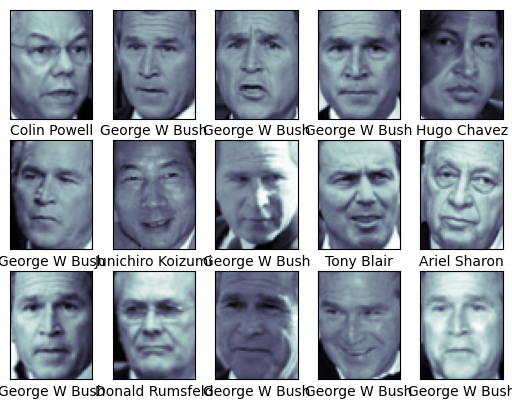

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

En esta parte, se logra ver 15 caras en una escala de grises junto con sus respectivos nombres. 

In [7]:

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Para el PCA, el cuál se usa para analizar componentes principales, usa 150 "instancias" para reducir las demensiones de cada imágen y que estas sean de 150 características. Este método es muy útil para extraer características para poder acelerar el entrenamiento de la máquina de soporte, ya que esta es sensible a la dimensionalidad. 

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Aquí se utiliza la división de datos para garantizar que el modelo use la mayor cantidad de datos posibles y hacer una buena generalización, es decir, que más allá de los datos proporcionados, siga siendo bueno. 

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 4min 47s, sys: 15 s, total: 5min 2s
Wall time: 54.9 s
{'svc__C': 5, 'svc__gamma': 0.001}


Usando Grid Search, definimos la cuadrícula de hiperparámetros que se van a probar, buscando el mejor valor para C y para gamma. C y gamma. Este modelo hace cross-validation para probar todas las combinaciones de param_grid.

In [10]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Selecciona el pipeline con los mejores parámetros y hace las predicciones para las imágenes del conjunto de prueba, las cuales se deben de comprobar con el y_test para evaluar qué tan bueno es el modelo; su rendimiento. 

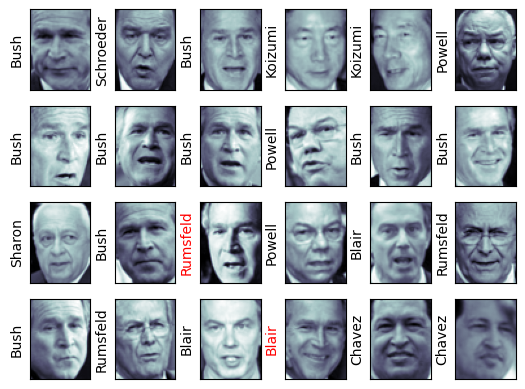

In [14]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
plt.show()

Se muestran las 24 imágenes del X_test junto con  etiqueta que predice el nombre. En este caso, vemos tres de color rojo, lo que significa que el nombre es incorrecto, destacando visualmente los errores de clasificación del modelo.

In [15]:

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Imprime las métricas de clasificación y su accuracy para ver la consistencia del modelo y que tan atinadas fueron sus predicciones; de los que dijo que iban a ser con x nombre, tantos sí tienen ese nombre. 

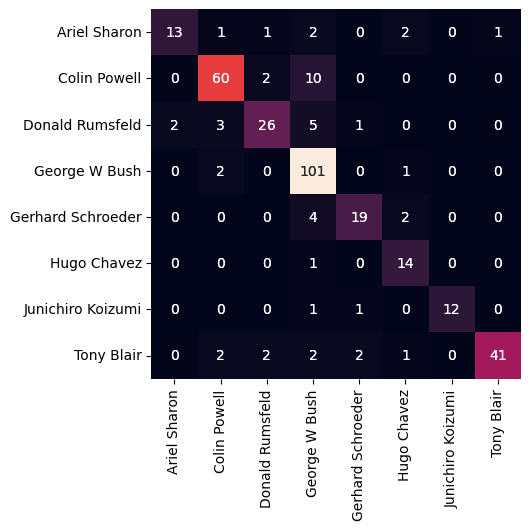

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.show()

Hace una matriz, donde cada fila es la "clase real" vs la columna de predicciones. De esta manera se ve que clases se confunden entre sí. 

## Repetición con Data set de dígtos

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.target_names)
print(digits.images.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797, 8, 8)


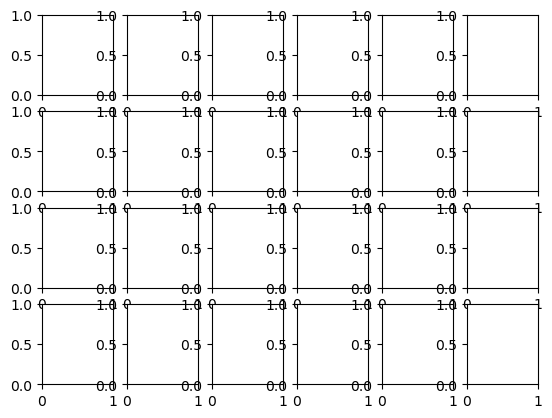

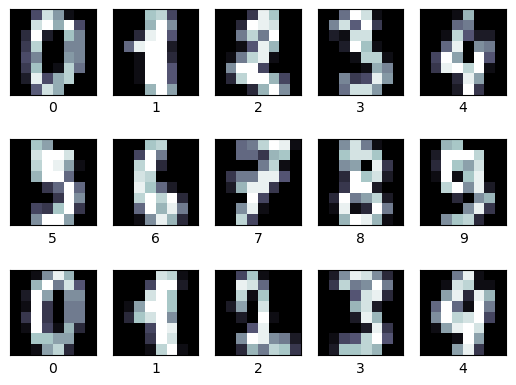

In [39]:
# Pipeline del modelo
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=digits.target_names[digits.target[i]])
plt.show()

In [40]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=40, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 47s, sys: 5.97 s, total: 1min 53s
Wall time: 21.9 s
{'svc__C': 5, 'svc__gamma': 0.005}


In [43]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

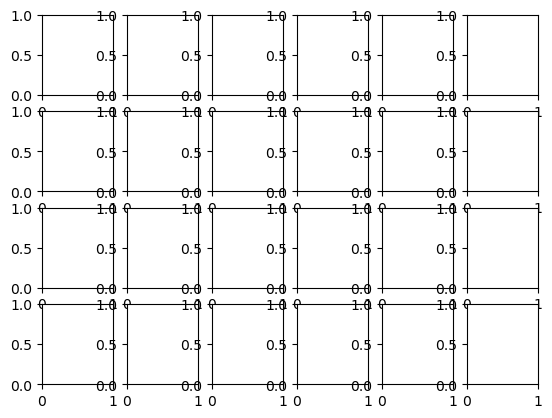

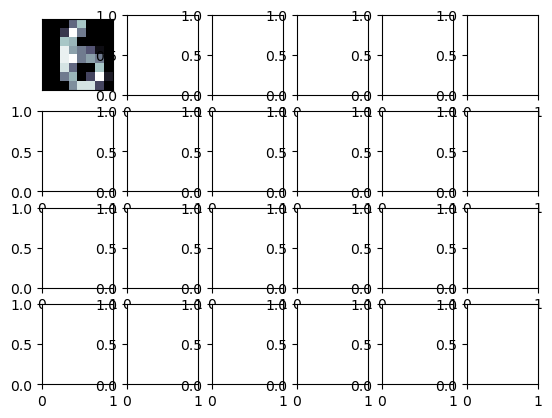

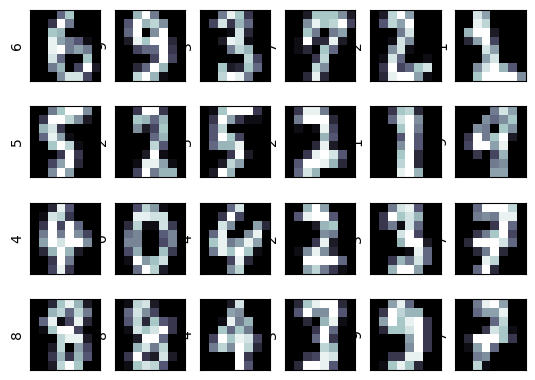

In [46]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(8, 8), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(digits.target_names[yfit[i]],
               color='black' if yfit[i] == ytest[i] else 'red')
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=[str(i) for i in digits.target_names]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      0.98      0.99        45
           7       1.00      0.98      0.99        41
           8       0.95      1.00      0.97        38
           9       0.98      0.98      0.98        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



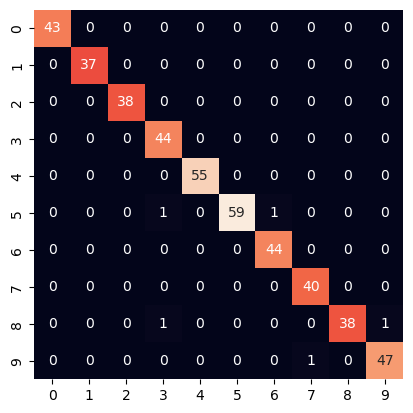

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.show()

El modelo de clasificación, utilizando el pipeline de PCA y SVC, demostró un rendimiento alto en el dataset de dígitos. Tras reducir las imágenes de 8×8 a 40 componentes principales, el Grid Search optimizó el SVC, resultando en una precisión (accuracy) del 0.99. Este resultado es típico para tareas de clasificación bien definidas y de baja dimensionalidad como los dígitos escritos a mano. La matriz y el reporte de clasificación confirmaron que el modelo clasifica correctamente casi la totalidad de las imágenes del conjunto de prueba, con métricas de precisión y recall cercanas al 1.00 para la mayoría de las diez clases.

La actividad probó la eficiencia de la metodología PCA + SVC en la clasificación de imágenes. Para el reconocimiento facial (LFW), la técnica logró una buena precisión del 85%, superando la complejidad de las imágenes de caras con su alta dimensionalidad. Para el dataset de dígitos, el mismo pipeline alcanzó el 99% de precisión. En ambos casos, PCA fue crucial, actuando como un extractor de características que redujo la complejidad de los datos, mientras que SVC proporcionó la capacidad de clasificacarlos. La combinación optimizada por Grid Search demuestra la efectividad de estas herramientas para el procesamiento de imágenes en el aprendizaje automático.